In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
x,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                          n_classes=2, n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

In [3]:
import matplotlib.pyplot as plt

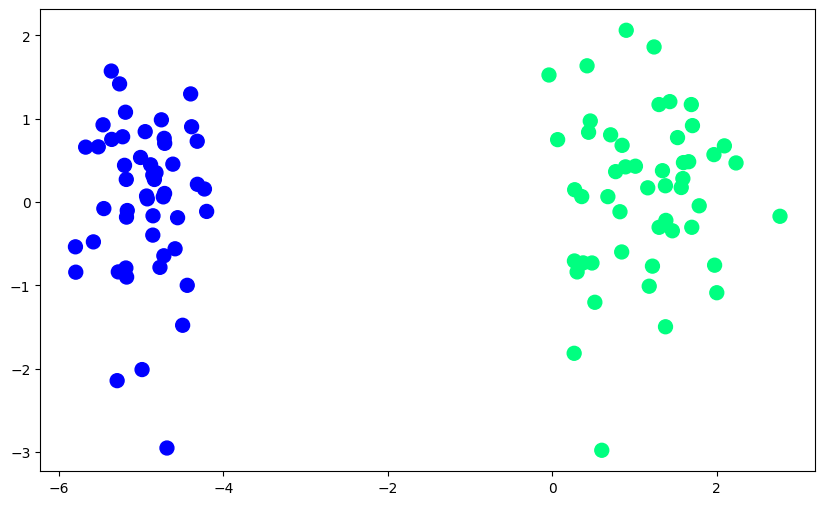

In [4]:
plt.figure(figsize=[10,6])
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [5]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(x,y)

In [8]:
print(coef_)
print(intercept_)

[1.08682872 0.52024363]
1.2000000000000002


In [9]:
''' Ax+By+C=0
    m = -A/B 
    b = -C/B
'''
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

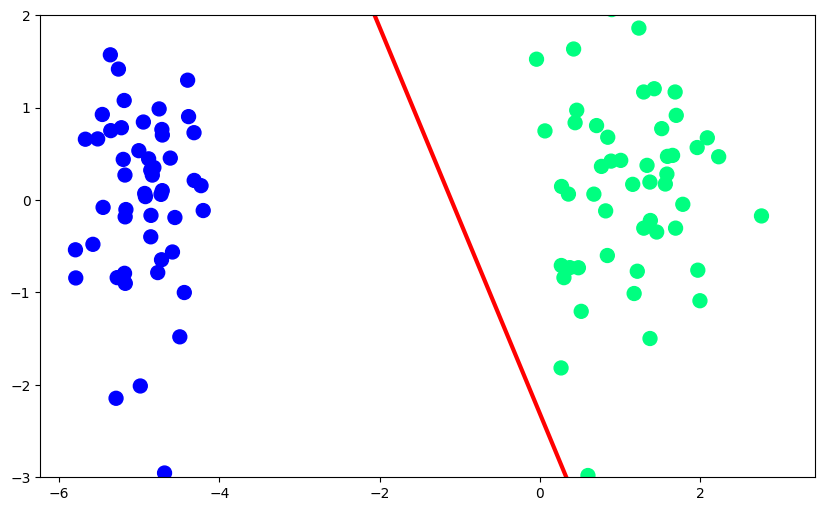

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

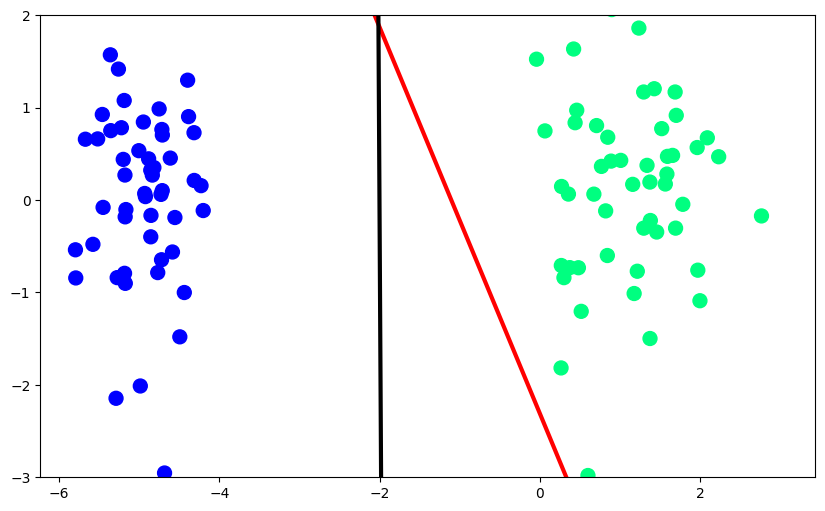

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [22]:
def perceptron(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [24]:
intercept_,coef_ = perceptron(x,y)

In [25]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [26]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

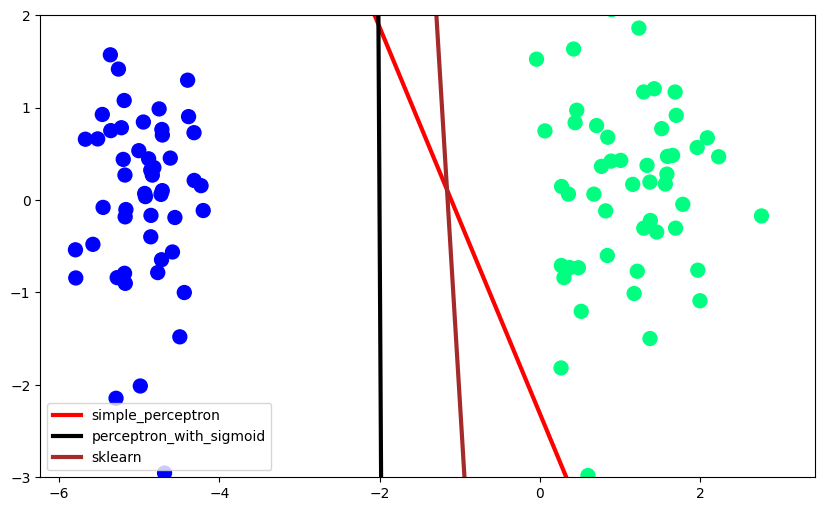

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='simple_perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='perceptron_with_sigmoid')
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label='sklearn')
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()